In [217]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from google.colab import drive

In [157]:
def KNN(train_X,train_Y,test_X,k):
  predicted_Y = []
  for test in test_X:
    distances_indexes = []
    index = 0
    count = 0

    for i,train in enumerate(train_X):
      distance = np.linalg.norm(train - test)
      dist_ind = [];
      dist_ind.append(distance)
      dist_ind.append(i)
      distances_indexes.append(dist_ind)

    sorted_dist_indexes = sorted(distances_indexes, key=lambda x: x[0])

    while(index<k):
      if(train_Y[sorted_dist_indexes[index][1]]==0):
        count = count-1
      else:
        count = count+1
      index = index+1

    if count > 0 :
      predicted_Y.append(1)
    else :
      predicted_Y.append(0)


  return np.array(predicted_Y)


In [158]:
def getAccuracyPrecisionRecall(predicted_Y,actual_Y):
  TP = np.count_nonzero((predicted_Y==1) & (actual_Y == 1))
  FP = np.count_nonzero((predicted_Y==1) & (actual_Y == 0))

  TN = np.count_nonzero((predicted_Y==0) & (actual_Y == 0))
  FN = np.count_nonzero((predicted_Y==0) & (actual_Y == 1))

  accuracy = (TP+TN)/(TP+FP+TN+FN)
  precision = (TP)/(TP+FP)
  recall = TP/(TP+FN)

  return accuracy,precision,recall

In [159]:
def load_data(file_path,delimiter,skip_header):
  data = np.genfromtxt(file_path, delimiter=delimiter, skip_header=skip_header)
  Y = data[:, -1]
  X = data[:,:-1]

  return X,Y

In [160]:
def generateTestData():
  # Create a range of values from -2 to 2 with a step size of 0.1
  x_values = np.arange(-2, 2.1, 0.1)
  y_values = np.arange(-2, 2.1, 0.1)

  # Create a 2D grid
  x_grid, y_grid = np.meshgrid(x_values, y_values)

  # Flatten the grids to get 1D arrays
  x_flat = x_grid.flatten()
  y_flat = y_grid.flatten()

  # Combine x and y coordinates into a 2D array
  test_data_2d = np.column_stack((x_flat, y_flat))

  return test_data_2d

Q 2.1

In [161]:
train_X, train_Y = load_data('D2z.txt',' ',0)
test_data = generateTestData()
knn_predictions = KNN(train_X=train_X,train_Y=train_Y,test_X=test_data,k=1)


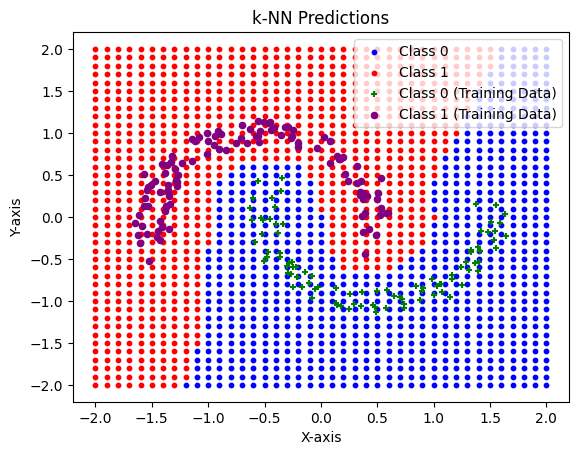

In [162]:


# Scatter plot for class 0
plt.scatter(test_data[knn_predictions == 0, 0], test_data[knn_predictions == 0, 1], s=10, c='blue', label='Class 0')

# Scatter plot for class 1
plt.scatter(test_data[knn_predictions == 1, 0], test_data[knn_predictions == 1, 1], s=10, c='red', label='Class 1')

plt.scatter(train_X[train_Y == 0, 0], train_X[train_Y == 0, 1], s=20, c='green', marker='+', label='Class 0 (Training Data)')
plt.scatter(train_X[train_Y == 1, 0], train_X[train_Y == 1, 1], s=20, c='purple', marker='o', label='Class 1 (Training Data)')


plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('k-NN Predictions')
plt.legend()

# Show the plot
plt.show()


Q 2.2

In [163]:
train_X_e,train_Y_e = load_data('/content/emails.csv',',',1)
train_X_e = train_X_e[:, 1:]

In [164]:
print(train_X_e.shape)

(5000, 3000)


In [165]:
def FiveFoldKNN(train_X,train_Y,k):
  data = np.column_stack((train_X, train_Y))
  # Specify the ranges for each fold
  fold_ranges = [(0, 1000), (1000, 2000), (2000, 3000), (3000, 4000), (4000, 5000)]

  accuracy = np.zeros(5)
  precision = np.zeros(5)
  recall = np.zeros(5)
  for fold, (start_idx, end_idx) in enumerate(fold_ranges):
      # Extract the indices for training and testing sets
      test_indices = np.arange(start_idx, end_idx)
      train_indices = np.setdiff1d(np.arange(5000), test_indices)

      # Extract features and labels from the sets
      train_set, test_set = data[train_indices], data[test_indices]


      # Extract features and labels from the sets
      train_X_fold, train_Y_fold = train_set[:, :-1], train_set[:, -1]
      test_X_fold, test_Y_fold = test_set[:, :-1], test_set[:, -1]

      knn_predictions  = KNN(train_X_fold,train_Y_fold,test_X_fold,k)
      accuracy[fold],precision[fold],recall[fold] = getAccuracyPrecisionRecall(knn_predictions,test_Y_fold)
      # return accuracy[fold],precision[fold],recall[fold]
  return accuracy,precision,recall

In [166]:
accuracy,precision,recall = FiveFoldKNN(train_X_e,train_Y_e,1)

In [167]:
print(accuracy,precision,recall)

[0.825 0.853 0.862 0.851 0.775] [0.65449438 0.68571429 0.72121212 0.71641791 0.60574413] [0.81754386 0.86642599 0.83802817 0.81632653 0.75816993]


Q2.3

In [204]:
def logisticRegressionTrain(steps,learning_rate,train_X,train_Y):
  parameters = np.zeros(train_X.shape[1]);
  parameters.reshape(train_X.shape[1],1)
  while(steps>0):
    steps = steps-1
    predicted_Y = 1/(1+np.exp(-np.matmul(train_X,parameters)))
    # loss = -np.mean(train_Y*np.log(predicted_Y)+(1-train_Y)*np.log(1-predicted_Y))
    # if loss <0.05:
    #   return parameters
    diff = (predicted_Y - train_Y)
    diff.reshape(train_X.shape[0],1)
    gradient = np.dot(diff.T, train_X) / len(train_Y)
    parameters = parameters - learning_rate * gradient.T

  return parameters



In [169]:
def logisticRegressionPredict(params,test_X):
  predicted_Y = 1 / (1 + np.exp(-np.matmul(test_X, params)))

  # Use NumPy's vectorized operations for element-wise comparison
  predicted_Y = (predicted_Y > 0.5).astype(int)

  return predicted_Y

In [170]:
def FiveFoldLogistic(train_X,train_Y,steps,learning_rate):
  data = np.column_stack((train_X, train_Y))
  # Specify the ranges for each fold
  fold_ranges = [(0, 1000), (1000, 2000), (2000, 3000), (3000, 4000), (4000, 5000)]

  accuracy = np.zeros(5)
  precision = np.zeros(5)
  recall = np.zeros(5)
  for fold, (start_idx, end_idx) in enumerate(fold_ranges):
      # Extract the indices for training and testing sets
      test_indices = np.arange(start_idx, end_idx)
      train_indices = np.setdiff1d(np.arange(5000), test_indices)

      # Extract features and labels from the sets
      train_set, test_set = data[train_indices], data[test_indices]


      # Extract features and labels from the sets
      train_X_fold, train_Y_fold = train_set[:, :-1], train_set[:, -1]
      test_X_fold, test_Y_fold = test_set[:, :-1], test_set[:, -1]

      params = logisticRegressionTrain(steps,learning_rate,train_X_fold,train_Y_fold)
      logistic_predictions  = logisticRegressionPredict(params,test_X_fold)
      accuracy[fold],precision[fold],recall[fold] = getAccuracyPrecisionRecall(logistic_predictions,test_Y_fold)
      # return accuracy[fold],precision[fold],recall[fold]
  return accuracy,precision,recall

In [179]:
ones = np.ones(train_X_e.shape[0])
train_X_l = np.hstack((ones[:, np.newaxis], train_X_e))
train_Y_l = train_Y_e
accuracy,precision,recall = FiveFoldLogistic(train_X_l,train_Y_l,1000,0.015)

<ipython-input-168-f019e16c5241>:6: RuntimeWarning: overflow encountered in exp
  predicted_Y = 1/(1+np.exp(-np.matmul(train_X,parameters)))
<ipython-input-168-f019e16c5241>:7: RuntimeWarning: divide by zero encountered in log
  loss = -np.mean(train_Y*np.log(predicted_Y)+(1-train_Y)*np.log(1-predicted_Y))
<ipython-input-168-f019e16c5241>:7: RuntimeWarning: invalid value encountered in multiply
  loss = -np.mean(train_Y*np.log(predicted_Y)+(1-train_Y)*np.log(1-predicted_Y))
<ipython-input-169-af8cc1d77d99>:2: RuntimeWarning: overflow encountered in exp
  predicted_Y = 1 / (1 + np.exp(-np.matmul(test_X, params)))


In [172]:
print(accuracy,precision,recall)

[0.909 0.896 0.89  0.844 0.849] [0.83680556 0.82156134 0.82462687 0.66586538 0.78810409] [0.84561404 0.79783394 0.77816901 0.94217687 0.69281046]


Q 2.4

In [173]:
k_values = [1,3,5,7,10]
avg_accuracy = []
for k in k_values:
  accuracy,_,_ = FiveFoldKNN(train_X_e,train_Y_e,k)
  avg_accuracy.append(np.mean(accuracy))

In [177]:
print(avg_accuracy)

[0.8332, 0.8423999999999999, 0.8417999999999999, 0.8454, 0.8552]


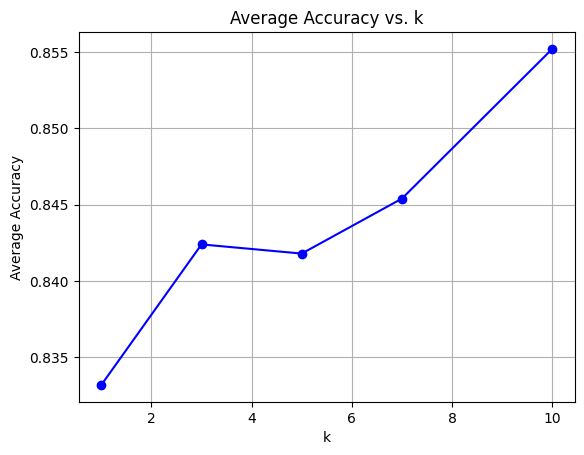

In [176]:
# Plotting
plt.plot(k_values, avg_accuracy, marker='o', linestyle='-', color='b')

# Adding labels and title
plt.xlabel('k')
plt.ylabel('Average Accuracy')
plt.title('Average Accuracy vs. k')
# Adding grid
plt.grid(True)

# Show the plot
plt.show()


Q2.5

In [207]:
def ROCCurves(train_X,train_Y,steps,learning_rate,k):
  data = np.column_stack((train_X, train_Y))
  # Specify the ranges for each fold
  fold_ranges = [(4000, 5000)]

  for fold, (start_idx, end_idx) in enumerate(fold_ranges):
      # Extract the indices for training and testing sets
      test_indices = np.arange(start_idx, end_idx)
      train_indices = np.setdiff1d(np.arange(5000), test_indices)

      # Extract features and labels from the sets
      train_set, test_set = data[train_indices], data[test_indices]


      # Extract features and labels from the sets
      train_X_fold, train_Y_fold = train_set[:, :-1], train_set[:, -1]
      test_X_fold, test_Y_fold = test_set[:, :-1], test_set[:, -1]

      knn_predictions  = KNN(train_X_fold,train_Y_fold,test_X_fold,k)

      fpr_k, tpr_k, thresholds_k = roc_curve(test_Y_fold, knn_predictions)
      roc_auc_k = roc_auc_score(test_Y_fold, knn_predictions)

      ones = np.ones(train_X_fold.shape[0])
      train_X_fold_l = np.hstack((ones[:, np.newaxis], train_X_fold))
      train_Y_fold_l = train_Y_fold

      ones = np.ones(test_X_fold.shape[0])
      test_X_fold_l = np.hstack((ones[:, np.newaxis], test_X_fold))
      test_Y_fold_l = test_Y_fold

      params = logisticRegressionTrain(steps,learning_rate,train_X_fold_l,train_Y_fold_l)
      logistic_predictions  = logisticRegressionPredict(params,test_X_fold_l)

      fpr_l, tpr_l, thresholds_l = roc_curve(test_Y_fold_l, logistic_predictions)
      roc_auc_l = roc_auc_score(test_Y_fold_l, logistic_predictions)


  return fpr_l, tpr_l, thresholds_l,roc_auc_l,fpr_k, tpr_k, thresholds_k,roc_auc_k

In [213]:
fpr_l, tpr_l, thresholds_l,roc_auc_l,fpr_k, tpr_k, thresholds_k,roc_auc_k = ROCCurves(train_X_e,train_Y_e,10000,0.015,5)

<ipython-input-204-733cef133e5b>:6: RuntimeWarning: overflow encountered in exp
  predicted_Y = 1/(1+np.exp(-np.matmul(train_X,parameters)))


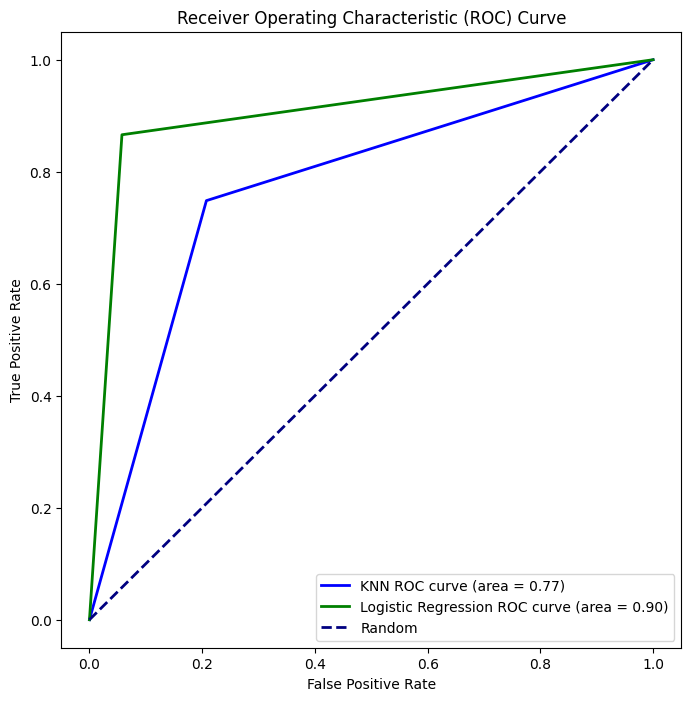

In [214]:
# Plotting the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr_k, tpr_k, color='blue', linestyle='-', lw=2, label='KNN ROC curve (area = {:.2f})'.format(roc_auc_k))
plt.plot(fpr_l, tpr_l, color='green', linestyle='-', lw=2, label='Logistic Regression ROC curve (area = {:.2f})'.format(roc_auc_l))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')


plt.show()